In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
game_id = "2d073362-7d58-4c68-b0d7-4e7006009ef6"
game_df = pd.read_csv(rf"..\data\game_shots\{game_id}.csv")
game_df.head()

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal
0,0,games5425898691,0,23,0.084870,True
1,1,EgorTerl,1,37,0.074900,False
2,2,EgorTerl,1,38,0.385792,False
3,3,simmigthebeast1,1,39,0.981080,True
4,4,enpitsu,0,40,0.002193,False


In [3]:
game_df.loc[-1] = {'time': 0, 'shot_taker_name': '-', 'goal': 0}
game_df.index += 1
game_df.sort_index(inplace=True)
game_df.loc[len(game_df)] = {'time': max(300, game_df['time'].max()), 'shot_taker_name': '-', 'goal': 0}
orange_xg_sum = game_df[game_df['is_orange']==1]['xg'].cumsum()
game_df['orange_xg_sum'] = orange_xg_sum
blue_xg_sum = game_df[game_df['is_orange']==0]['xg'].cumsum()
game_df['blue_xg_sum'] = blue_xg_sum
game_df.fillna(method='ffill', inplace=True)
game_df.fillna(value=0, inplace=True)

In [4]:
game_df

,Unnamed: 0,shot_taker_name,is_orange,time,xg,goal,orange_xg_sum,blue_xg_sum
0,0.0,-,0.0,0,0.000000,0,0.000000,0.000000
1,0.0,games5425898691,0.0,23,0.084870,1,0.000000,0.084870
2,1.0,EgorTerl,1.0,37,0.074900,0,0.074900,0.084870
3,2.0,EgorTerl,1.0,38,0.385792,0,0.460692,0.084870
4,3.0,simmigthebeast1,1.0,39,0.981080,1,1.441771,0.084870
5,4.0,enpitsu,0.0,40,0.002193,0,1.441771,0.087064
6,5.0,enpitsu,0.0,50,0.040035,1,1.441771,0.127099
7,6.0,EgorTerl,1.0,56,0.413190,0,1.854961,0.127099
8,7.0,enpitsu,0.0,80,0.813218,0,1.854961,0.940316
9,8.0,enpitsu,0.0,110,0.832418,0,1.854961,1.772734


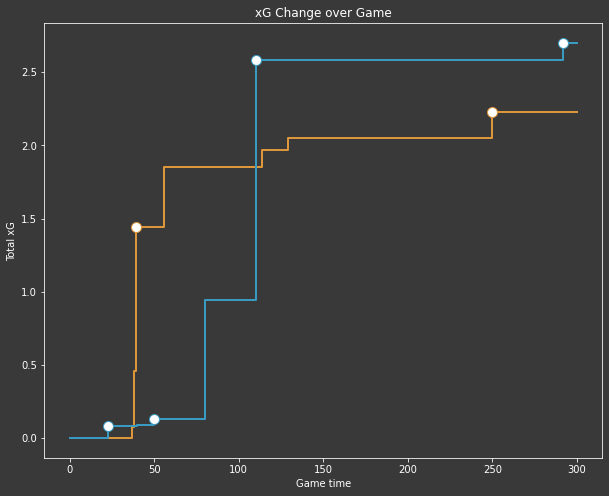

In [5]:
with plt.rc_context({
    'axes.edgecolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': '#393939',
    'axes.labelcolor': 'white',
    'axes.facecolor': '#393939',
    }):
    fig, ax = plt.subplots(figsize=(10,8))
    # ax.set_facecolor('gray')
    # fig.set_facecolor('gray')
    game_df.plot(drawstyle='steps-post', x='time', y='orange_xg_sum', linewidth=2, c='#DD9639', ax=ax, legend=False, zorder=0)
    game_df.plot(drawstyle='steps-post', x='time', y='blue_xg_sum', linewidth=2, c='#3A9BC2', ax=ax, legend=False, zorder=0)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==1)].reset_index().plot.scatter(x='time', y='orange_xg_sum', ax=ax, edgecolor='#DD9639', s=100, c='white', zorder=1)
    game_df[(game_df['goal']==1) & (game_df['is_orange']==0)].reset_index().plot.scatter(x='time', y='blue_xg_sum', ax=ax, edgecolor='#3A9BC2', s=100, c='white', zorder=1)
    plt.title("xG Change over Game", color='white')
    plt.ylabel("Total xG")
    plt.xlabel("Game time")
    

In [6]:
pd.DataFrame(game_df[game_df['shot_taker_name'] != "-"].groupby('shot_taker_name').agg({'xg': 'sum', 'goal': 'sum', 'is_orange': 'first'})).sort_values(by=['is_orange', 'xg'], ascending=[True, False]).rename(columns={'is_orange': 'team (orange)'})

,xg,goal,team (orange)
shot_taker_name,,,
enpitsu,2.494840,2,0.0
games5425898691,0.206452,2,0.0
simmigthebeast1,1.356316,2,1.0
EgorTerl,0.873882,0,1.0
